# Pytorch - Deep learning

In [19]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import MinMaxScaler, StandardScaler

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# df = pd.read_csv('drive/MyDrive/Bcell_Epitopes/bcell_cleaned.csv')
# df_sample = df.groupby('antibody_activity', group_keys=False).apply(lambda x: x.sample(min(len(x), 1000), random_state=42))

# df_test = pd.read_csv('drive/MyDrive/Bcell_Epitopes/sars_cleaned.csv')

# all = pd.read_csv('drive/MyDrive/Bcell_Epitopes/bcell_sars_cleaned.csv'

In [2]:
df = pd.read_csv('bcell_cleaned.csv')
df_sample = df.groupby('antibody_activity', group_keys=False).apply(lambda x: x.sample(min(len(x), 1000), random_state=42))

df_test = pd.read_csv('sars_cleaned.csv')


In [ ]:
# # bcell and sars together
# all = pd.read_csv('bcell_sars_cleaned.csv')

# # take sample with even distribution of antibody activity
# all_sample = all.groupby('antibody_activity', group_keys=False).apply(lambda x: x.sample(min(len(x), 4032), random_state=42))

# # split into train and test
# all_train = all_sample.sample(frac=0.8, random_state=42)
# all_test = all_sample.drop(all_train.index)

# # make Series of peptides, proteins, and targets
# all_pep = all_train['peptide_seq']
# all_prot = all_train['protein_seq']
# all_target = all_train['antibody_activity']

# # make Series of peptides, proteins, and targets for test set
# all_pep_test = all_test['peptide_seq']
# all_prot_test = all_test['protein_seq']
# all_target_test = all_test['antibody_activity']

# # amino acid dictionary
# amino_acids = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

# # convert peptide and protein sequences to tensors
# all_pep_tensor = [torch.tensor([amino_acids.index(aa) for aa in seq], dtype=torch.long) for seq in all_pep]
# all_prot_tensor = [torch.tensor([amino_acids.index(aa) for aa in seq], dtype=torch.long) for seq in all_prot]
# all_labels = torch.tensor(all_target, dtype=torch.long).to(device)

# # convert peptide and protein sequences to tensors for test set
# all_pep_tensor_test = [torch.tensor([amino_acids.index(aa) for aa in seq], dtype=torch.long) for seq in all_pep_test]
# all_prot_tensor_test = [torch.tensor([amino_acids.index(aa) for aa in seq], dtype=torch.long) for seq in all_prot_test]
# all_labels_test = torch.tensor(all_target_test.to_list(), dtype=torch.long).to(device)

# # scale peptide and protein tensors with min-max scaling
# scaler = MinMaxScaler()
# all_pep_tensor = [scaler.fit_transform(seq.reshape(-1, 1)).reshape(-1) for seq in all_pep_tensor]
# all_prot_tensor = [scaler.fit_transform(seq.reshape(-1, 1)).reshape(-1) for seq in all_prot_tensor]

# # scale peptide and protein tensors with min-max scaling for test set
# all_pep_tensor_test = [scaler.fit_transform(seq.reshape(-1, 1)).reshape(-1) for seq in all_pep_tensor_test]
# all_prot_tensor_test = [scaler.fit_transform(seq.reshape(-1, 1)).reshape(-1) for seq in all_prot_tensor_test]

# # transform back to tensors
# all_pep_tensor = [torch.tensor(seq, dtype=torch.long) for seq in all_pep_tensor]
# all_prot_tensor = [torch.tensor(seq, dtype=torch.long) for seq in all_prot_tensor]

# # transform back to tensors for test set
# all_pep_tensor_test = [torch.tensor(seq, dtype=torch.long) for seq in all_pep_tensor_test]
# all_prot_tensor_test = [torch.tensor(seq, dtype=torch.long) for seq in all_prot_tensor_test]


# # pad peptide and protein sequences
# all_pep_tensor = torch.nn.utils.rnn.pad_sequence(all_pep_tensor, batch_first=True).to(device)
# all_prot_tensor = torch.nn.utils.rnn.pad_sequence(all_prot_tensor, batch_first=True).to(device)
# all_pep_tensor_test = torch.nn.utils.rnn.pad_sequence(all_pep_tensor_test, batch_first=True).to(device)
# all_prot_tensor_test = torch.nn.utils.rnn.pad_sequence(all_prot_tensor_test, batch_first=True).to(device)

In [ ]:
all_sample = all.groupby('antibody_activity', group_keys=False).apply(lambda x: x.sample(min(len(x), 1000), random_state=42))

X = all_sample[['peptide_seq', 'protein_seq']]
y = all_sample['antibody_activity']

# split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, stratify=y)

prot_train = X_train['protein_seq']
pep_train = X_train['peptide_seq']
prot_test = X_test['protein_seq']
pep_test = X_test['peptide_seq']

# amino acid dictionary
amino_acids = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

# convert peptide sequence to tensor
pep_train = [torch.tensor([amino_acids.index(aa) for aa in seq], dtype=torch.long) for seq in pep_train]
prot_train = [torch.tensor([amino_acids.index(aa) for aa in seq], dtype=torch.long) for seq in prot_train]
labels_train = torch.tensor(y_train, dtype=torch.long).to(device)

# convert peptide sequence to tensor for test set
pep_test = [torch.tensor([amino_acids.index(aa) for aa in seq], dtype=torch.long) for seq in pep_test]
prot_test = [torch.tensor([amino_acids.index(aa) for aa in seq], dtype=torch.long) for seq in prot_test]
labels_test = torch.tensor(y_test.to_list(), dtype=torch.long).to(device)

# pad peptide sequence to the same length
pep_train = torch.nn.utils.rnn.pad_sequence(pep_train, batch_first=True).to(device)
prot_train = torch.nn.utils.rnn.pad_sequence(prot_train, batch_first=True).to(device)
pep_test = torch.nn.utils.rnn.pad_sequence(pep_test, batch_first=True).to(device)
prot_test = torch.nn.utils.rnn.pad_sequence(prot_test, batch_first=True).to(device)

In [3]:
prot_seq = df_sample['protein_seq']
pep_seq = df_sample['peptide_seq']
start = df_sample['start_position']
target = df_sample['antibody_activity']
mask = df_sample['peptide_mask']

prot_seq_test = df_test['protein_seq']
pep_seq_test = df_test['peptide_seq']
start_test = df_test['start_position']
target_test = df_test['antibody_activity']
mask_test = df_test['peptide_mask']

In [61]:
def NormalizeTensor(data):
    return (data - torch.min(data)) / (torch.max(data) - torch.min(data))

In [4]:
# amino acids dictionary
amino_acids = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

# convert peptide sequence to tensor
pep_tensor = [torch.tensor([amino_acids.index(aa) for aa in seq], dtype=torch.long) for seq in pep_seq]
prot_tensor = [torch.tensor([amino_acids.index(aa) for aa in seq], dtype=torch.long) for seq in prot_seq]
labels_tensor = torch.tensor(target, dtype=torch.long).to(device)


pep_tensor_test = [torch.tensor([amino_acids.index(aa) for aa in seq], dtype=torch.long) for seq in pep_seq_test]
prot_tensor_test = [torch.tensor([amino_acids.index(aa) for aa in seq], dtype=torch.long) for seq in prot_seq_test]
labels_tensor_test = torch.tensor(target_test, dtype=torch.long).to(device)

# pad peptide sequence to the same length
pep_tensor = nn.utils.rnn.pad_sequence(pep_tensor, batch_first=True).to(device)
prot_tensor = nn.utils.rnn.pad_sequence(prot_tensor, batch_first=True).to(device)
pep_tensor_test = nn.utils.rnn.pad_sequence(pep_tensor_test, batch_first=True).to(device)
prot_tensor_test = nn.utils.rnn.pad_sequence(prot_tensor_test, batch_first=True).to(device)

# normalize tensors - not sure if this is necessary
# pep_tensor = NormalizeTensor(pep_tensor)
# prot_tensor = NormalizeTensor(prot_tensor)
# pep_tensor_test = NormalizeTensor(pep_tensor_test)
# prot_tensor_test = NormalizeTensor(prot_tensor_test)

In [6]:
embedding_dim = 64
hidden_dim = 32
num_layers = 2
num_classes = 2
num_epochs = 10
batch_size = 64
learning_rate = 0.003

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## RNN

In [ ]:
class RNN(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, num_layers, num_classes) -> None:
        super(RNN, self).__init__()
        self.num_layers = num_layers
        self.hidden_dim = hidden_dim
        self.embedding = nn.Embedding(20, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, num_layers, batch_first=True)
        # x shape -> (batch_size, seq_size, input_size)

        self.fc = nn.Linear(hidden_dim, num_classes)
    
    def forward(self, seq):
        h0 = torch.zeros(self.num_layers, seq.size(0), self.hidden_dim).to(device)

        out, _ = self.rnn(self.embedding(seq), h0)
        # out: batch_size, seq_length, hidden_dim
        # out (N, seq , 32)
        out = out[:, -1, :]
        # out (N, 32)
        out = self.fc(out)
        return out


In [48]:
def train_test(model, num_epochs, batch_size, learning_rate, X, y, X_test, y_test):
    '''
    train and test rnn model
    '''
    # loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        loss_sum = 0
        acc_sum = 0
        acc_sum_test = 0
        for i in range(0, len(X), batch_size):
            # print(f'/rEpoch = {epoch}', end='')
            batch_X = X[i:i+batch_size]
            batch_y = y[i:i+batch_size]
            
            optimizer.zero_grad()
            output_values = model(batch_X)

            loss = criterion(output_values, batch_y)

            loss.backward()
            optimizer.step()

            loss_sum += loss.item()
            
            predicted = torch.argmax(output_values, dim=1)
            acc_sum += (predicted == batch_y).sum().item() / len(batch_y)

        loss_avg = round((loss_sum / (len(X) / batch_size)), 3)
        acc_avg = round((acc_sum / (len(X) / batch_size)), 3)

        predicted_test = torch.argmax(model(X_test), dim=1)
        acc_sum_test = (predicted_test == y_test).sum().item() / len(y_test)
        acc_avg_test = round((acc_sum_test), 3)
        # f1 score for test set positive class
        f1 = round(f1_score(y_test, predicted_test, pos_label=1), 3)

        if updates == True:
            print(f'Epoch = {epoch+1}, loss = {loss_avg}, acc = {acc_avg*100}, test_acc = {acc_avg_test*100}, f1 (pos) = {f1}')
        # scores.loc[epoch, "Epoch"] = epoch + 1
        scores.loc[epoch, 'Training Accuracy'] = acc_avg*100
        scores.loc[epoch, 'Test Accuracy'] = acc_avg_test*100

    scores.plot(kind='line')

    print('Finished Training')
            



In [ ]:
rnn = RNN(embedding_dim, hidden_dim, num_layers, num_classes).to(device)

In [ ]:
train_test(rnn, 20, batch_size, 0.1, pep_tensor, labels_tensor, pep_tensor_test, labels_tensor_test)

## LSTM 

- unidirectional

In [ ]:
class Epitope_LSTM(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, num_layers, num_classes) -> None:
        super(Epitope_LSTM, self).__init__()
        self.num_layers = num_layers
        self.hidden_dim = hidden_dim
        self.embedding = nn.Embedding(20, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, batch_first=True, bidirectional=False)
        # x shape -> (batch_size, seq_size, input_size)

        self.fc = nn.Linear(hidden_dim, num_classes)
    
    def forward(self, seq):
        h0 = torch.zeros(self.num_layers, seq.size(0), self.hidden_dim).to(device)
        c0 = torch.zeros(self.num_layers, seq.size(0), self.hidden_dim).to(device)

        out, _ = self.lstm(self.embedding(seq), (h0,c0))
        # out: batch_size, seq_length, hidden_dim
        # out (N, seq , 32)
        out = out[:, -1, :]
        # out (N, 32)
        out = self.fc(out)
        return out

In [ ]:
lstm = Epitope_LSTM(embedding_dim, hidden_dim, num_layers, num_classes).to(device)

In [ ]:
train_test(lstm, 20, batch_size, 0.1, pep_tensor, labels_tensor, pep_tensor_test, labels_tensor_test)

## LSTM with Sigmoid

In [ ]:
class Epitope_LSTM_sig(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, num_layers, num_classes) -> None:
        super(Epitope_LSTM_sig, self).__init__()
        self.num_layers = num_layers
        self.hidden_dim = hidden_dim
        self.embedding = nn.Embedding(20, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, batch_first=True, bidirectional=True)
        # x shape -> (batch_size, seq_size, input_size)

        self.fc = nn.Sequential(
            nn.Linear(hidden_dim*2, 20),
            nn.Sigmoid(),
            nn.Linear(20, num_classes)
        )
    
    def forward(self, seq):
        h0 = torch.zeros(self.num_layers*2, seq.size(0), self.hidden_dim).to(device)
        c0 = torch.zeros(self.num_layers*2, seq.size(0), self.hidden_dim).to(device)

        out, _ = self.lstm(self.embedding(seq), (h0,c0))
        # out: batch_size, seq_length, hidden_dim
        # out (N, seq , 32)
        out = out[:, -1, :]
        # out (N, 32)
        out = self.fc(out)
        return out

In [ ]:
lstm_sig = Epitope_LSTM_sig(embedding_dim, hidden_dim, num_layers, num_classes).to(device)

In [ ]:
train_test(lstm_sig, 40, batch_size, learning_rate, pep_tensor, labels_tensor, pep_tensor_test, labels_tensor_test)

## LSTM with multi-head attention mechanism
-unidirectional

In [ ]:
class LSTM_Attention(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, num_layers, num_classes) -> None:
        super(LSTM_Attention, self).__init__()
        self.num_layers = num_layers
        self.hidden_dim = hidden_dim
        self.embedding = nn.Embedding(20, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, batch_first=True, bidirectional=False)
        # x shape -> (batch_size, seq_size, input_size)

        self.attention = nn.MultiheadAttention(embed_dim=hidden_dim, num_heads=1)

        self.fc = nn.Sequential(
            nn.Linear(hidden_dim, 20),
            nn.Sigmoid(),
            nn.Linear(20, num_classes)
        )
    
    def forward(self, pep_seq, prot_seq):
        h0 = torch.zeros(self.num_layers, pep_seq.size(0), self.hidden_dim).to(device)
        c0 = torch.zeros(self.num_layers, pep_seq.size(0), self.hidden_dim).to(device)

        peptide_lstm, _ = self.lstm(self.embedding(pep_seq), (h0,c0))
        protein_lstm, _ = self.lstm(self.embedding(prot_seq), (h0,c0))
        # out: batch_size, seq_length, hidden_dim

        #permutations for attention
        peptide_lstm = peptide_lstm.permute(1,0,2)
        protein_lstm = protein_lstm.permute(1,0,2)

        #attention
        out, _ = self.attention(peptide_lstm, protein_lstm, protein_lstm)
        # out (seq, N, 32)

        #back to original shape
        out = out.permute(1,0,2)

        # out (N, seq , 32)
        # take the last output of the LSTM
        out = out[:, -1, :]
        # out (N, 32)
        out = self.fc(out)
        return out

In [ ]:
attn = LSTM_Attention(embedding_dim, hidden_dim, num_layers, num_classes).to(device)


In [ ]:
attn(pep_tensor, prot_tensor)

In [ ]:
def train_test_attn(model, epochs, batch_size, learning_rate, pep_train, prot_train, label, pep_test, prot_test, label_test, updates=False):
    '''
    train and test for LSTM with attention
    '''

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    for epoch in range(epochs):
        loss_sum = 0
        acc_sum = 0
        acc_sum_test = 0
        for i in range(0, len(pep_train), batch_size):
            batch_pep = pep_train[i:i+batch_size]
            batch_prot = prot_train[i:i+batch_size]
            batch_label = label[i:i+batch_size]

            #forward
            optimizer.zero_grad()
            outputs = model(batch_pep, batch_prot)

            loss = criterion(outputs, batch_label)

            loss.backward()
            optimizer.step()

            loss_sum += loss.item()

            predicted = torch.argmax(outputs, dim=1)
            acc_sum += (predicted == batch_label).sum().item() / len(batch_label)

        loss_avg = round((loss_sum / (len(pep_train) / batch_size)), 3)
        acc_avg = round((acc_sum / (len(pep_train) / batch_size)), 3)

        predicted_test = torch.argmax(model(pep_test, prot_test), dim=1)
        acc_sum_test += (predicted_test == label_test).sum().item() / len(label_test)
        acc_avg_test = round((acc_sum_test), 3)

        if updates == True:
            print(f'Epoch = {epoch+1}, loss = {loss_avg}, acc = {acc_avg*100}, test_acc = {acc_avg_test*100}')
        # scores.loc[epoch, "Epoch"] = epoch + 1
        scores.loc[epoch, 'Training Accuracy'] = acc_avg*100
        scores.loc[epoch, 'Test Accuracy'] = acc_avg_test*100

    scores.plot(kind='line')

    print('Finished Training')


In [ ]:
train_test_attn(attn, 20, batch_size, learning_rate, pep_tensor, prot_tensor, labels_tensor, pep_tensor_test, prot_tensor_test, labels_tensor_test)

## Bidirectional LSTM


In [7]:
class Epitope_biLSTM(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, num_layers, num_classes) -> None:
        super(Epitope_biLSTM, self).__init__()
        self.num_layers = num_layers
        self.hidden_dim = hidden_dim
        self.embedding = nn.Embedding(20, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, batch_first=True,
                            bidirectional=True)
        # x shape -> (batch_size, seq_size, input_size)

        self.fc = nn.Linear(hidden_dim*2, num_classes)
    
    def forward(self, seq):
        # Set initial hidden and cell states
        h0 = torch.zeros(self.num_layers*2, seq.size(0), self.hidden_dim).to(device)
        c0 = torch.zeros(self.num_layers*2, seq.size(0), self.hidden_dim).to(device)

        out, _ = self.lstm(self.embedding(seq), (h0,c0))
        # out: batch_size, seq_length, hidden_dim
        # out (N, seq , 32)
        out = out[:, -1, :]
        # out (N, 32)
        out = self.fc(out)
        return out

In [8]:
biLSTM = Epitope_biLSTM(embedding_dim, hidden_dim, num_layers, num_classes).to(device)

In [9]:
biLSTM(pep_tensor)

tensor([[-0.0701,  0.0647],
        [-0.0678,  0.0644],
        [-0.0759,  0.0534],
        ...,
        [-0.0655,  0.0754],
        [-0.0710,  0.0563],
        [-0.0594,  0.0910]], grad_fn=<AddmmBackward0>)

## Neural network for protein and peptide features

In [111]:
# simple neural network for numeric features
class Simple_NN(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes) -> None:
        super(Simple_NN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out
    
    def predict(self, x):
        out = self.forward(x)

        return torch.argmax(out, dim=1)

In [100]:
def simple_train_test(model, num_epochs, lr, X_train, y_train, X_test, y_test, batch_size, updates=False):
    
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    scores = pd.DataFrame()

    for epoch in range(num_epochs):
        loss_sum = 0
        acc_sum = 0
        acc_sum_test = 0
        for i in range(0, len(X_train), batch_size):
            batch_X = X_train[i:i+batch_size]
            batch_y = y_train[i:i+batch_size]

            optimizer.zero_grad()
            outputs = model(batch_X)

            loss = criterion(outputs, batch_y)

            loss.backward()
            optimizer.step()

            loss_sum += loss.item()

            predicted = model.predict(batch_X)
            acc_sum += (predicted == batch_y).sum().item() / len(batch_y)

        loss_avg = round((loss_sum / (len(X_train) / batch_size)), 3)
        acc_avg = round((acc_sum / (len(X_train) / batch_size)), 3)

        predicted_test = model.predict(X_test)
        acc_sum_test = (predicted_test == y_test).sum().item() / len(y_test)
        acc_avg_test = round((acc_sum_test), 3)

        if updates == True:
            print(f'Epoch = {epoch+1}, loss = {loss_avg}, acc = {acc_avg*100}, test_acc = {acc_avg_test*100}')

        scores.loc[epoch, 'Training Accuracy'] = acc_avg*100
        scores.loc[epoch, 'Test Accuracy'] = acc_avg_test*100
    
    scores.plot(kind='line')
    print('Finished Training')

In [112]:
from sklearn.model_selection import train_test_split

# setting features
features = ['chou_fasman', 'emini', 'kolaskar_tongaonkar', 'parker', 
            'parent_hydrophobicity', 'parent_isoelectric_point', 'parent_aromaticity', 'parent_instability_index',
            'amino_acid_pro', 'amino_acid_tyr', 'start_position']

# X_train = df[features]
# X_test = df_test[features]
# y_train = df['antibody_activity']
# y_test = df_test['antibody_activity']

# load bcell/sars data
bcell_sars = pd.read_csv('bcell_sars_cleaned.csv')
X = bcell_sars[features]
y = bcell_sars['antibody_activity']

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# scale features
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# convert to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)



In [115]:
input_dim = len(features)
simple_nn = Simple_NN(input_dim, hidden_dim, num_classes).to(device)

Epoch = 1, loss = 0.572, acc = 72.5, test_acc = 73.9
Epoch = 2, loss = 0.556, acc = 73.7, test_acc = 74.3
Epoch = 3, loss = 0.555, acc = 73.7, test_acc = 74.4
Epoch = 4, loss = 0.555, acc = 73.8, test_acc = 74.4
Epoch = 5, loss = 0.554, acc = 73.8, test_acc = 74.5
Epoch = 6, loss = 0.553, acc = 73.9, test_acc = 74.3
Epoch = 7, loss = 0.552, acc = 73.9, test_acc = 74.2
Epoch = 8, loss = 0.551, acc = 74.0, test_acc = 74.2
Epoch = 9, loss = 0.55, acc = 74.0, test_acc = 74.2
Epoch = 10, loss = 0.549, acc = 74.1, test_acc = 74.1
Epoch = 11, loss = 0.548, acc = 74.1, test_acc = 74.2
Epoch = 12, loss = 0.547, acc = 74.1, test_acc = 74.1
Epoch = 13, loss = 0.546, acc = 74.2, test_acc = 74.1
Epoch = 14, loss = 0.545, acc = 74.1, test_acc = 74.0
Epoch = 15, loss = 0.543, acc = 74.2, test_acc = 73.9
Epoch = 16, loss = 0.542, acc = 74.2, test_acc = 73.9
Epoch = 17, loss = 0.54, acc = 74.3, test_acc = 74.1
Epoch = 18, loss = 0.539, acc = 74.3, test_acc = 74.4
Epoch = 19, loss = 0.537, acc = 74.3, t

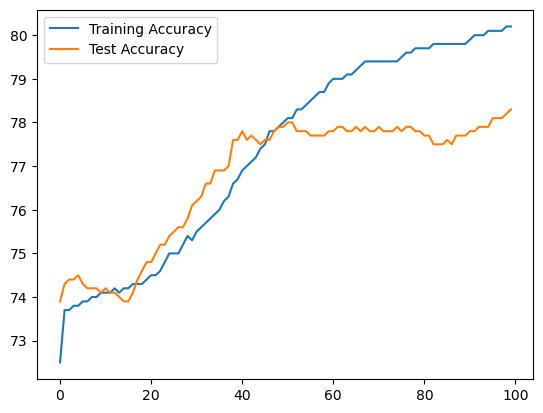

In [114]:
simple_train_test(simple_nn, 100, 0.3, X_train, y_train, X_test, y_test, batch_size, updates=True)

In [50]:
df['antibody_activity'].value_counts(normalize=True)

antibody_activity
0    0.728967
1    0.271033
Name: proportion, dtype: float64